# SDSS QSO

In [3]:
from astropy.table import Table
class_name = 'QSO'
spec = Table.read(f'/Volumes/Fucheng_S1/GaSNet_encoder/train_data_3600_9200/{class_name}.fits')
spec = spec[0:1000]
spec.write(f'./train_data_3600_9200/{class_name}.fits', format='fits', overwrite=True)

In [4]:
#import model_encoder as model
import model_unet as model
from astropy.table import Table
import torch

Path = './train_data_3600_9200'
gasnet3 = model.GaSNet3_UNet()
gasnet3.cfg['model_name'] = 'Model_testing'
gasnet3.cfg['z_max'] = 5
gasnet3.cfg['z_min'] = -0.01
gasnet3.cfg['egienV_num'] = 10
gasnet3.cfg['epochs'] = 5
gasnet3.cfg['batch_size'] = 128
gasnet3.device = torch.device('cpu')
spec = Table.read(f'{Path}/QSO.fits')
qso_spec = spec[spec['CLASS'] == 'QSO']
gasnet3.train_data = qso_spec[0:800]
gasnet3.valid_data = qso_spec[0:800]
gasnet3.Init()
gasnet3.training_loop()
gasnet3.test_data = qso_spec[800:]
gasnet3.test_data = gasnet3.test_data[gasnet3.test_data['Z']<5]
gasnet3.prediction()

/Users/apple/miniconda3/lib/python3.9/site-packages/diffusers/models/transformers/transformer_2d.py:34: FutureWarning: `Transformer2DModelOutput` is deprecated and will be removed in version 1.0.0. Importing `Transformer2DModelOutput` from `diffusers.models.transformer_2d` is deprecated and this will be removed in a future version. Please use `from diffusers.models.modeling_outputs import Transformer2DModelOutput`, instead.
  deprecate("Transformer2DModelOutput", "1.0.0", deprecation_message)


loglam grid: [3.5563 3.5564 3.5565 ... 3.9636 3.9637 3.9638]
pixel num: 4076 4076
z_min, z_max = -0.01 5
input spectrum wavelength 3600-9200 AA, dim=4076
egienspectrum dim: 11901 [2.77803658 2.77813659 2.7782366  ... 3.96795261 3.96805262 3.96815263]
Number of training data: 800
delta loglamd = 0.00010000975258739331
Spec shape= torch.Size([800, 1, 4076]) torch.Size([800, 1, 4076]) torch.Size([800, 1, 4076])
Spec type= torch.float32 torch.float32
Number of validation data: 800
delta loglamd = 0.00010000975258739331
Spec shape= torch.Size([800, 1, 4076]) torch.Size([800, 1, 4076]) torch.Size([800, 1, 4076])
Spec type= torch.float32 torch.float32
Network(
  (UNet): UNet1DModel(
    (time_proj): Timesteps()
    (down_blocks): ModuleList(
      (0): DownBlock1D(
        (down): Downsample1d()
        (resnets): ModuleList(
          (0): ResConvBlock(
            (conv_skip): Conv1d(1, 8, kernel_size=(1,), stride=(1,), bias=False)
            (conv_1): Conv1d(1, 8, kernel_size=(5,), stride

Validation: 100%|██████████| 7/7 [00:07<00:00,  1.09s/it]


Adjusting learning rate of group 0 to 1.0000e-03.
Epoch [1/5], Train Loss: 0.3567, Valid Loss: 0.3012
save the best checkpoint of  models/Model_testing/Model_testing.pth
learning rate [0.001]


Validation: 100%|██████████| 7/7 [00:07<00:00,  1.04s/it]


Adjusting learning rate of group 0 to 1.0000e-03.
Epoch [2/5], Train Loss: 0.2946, Valid Loss: 0.2903
save the best checkpoint of  models/Model_testing/Model_testing.pth
learning rate [0.001]


Validation: 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]


Adjusting learning rate of group 0 to 1.0000e-03.
Epoch [3/5], Train Loss: 0.2884, Valid Loss: 0.2864
save the best checkpoint of  models/Model_testing/Model_testing.pth
learning rate [0.001]


Validation: 100%|██████████| 7/7 [00:06<00:00,  1.01it/s]


Adjusting learning rate of group 0 to 1.0000e-03.
Epoch [4/5], Train Loss: 0.2858, Valid Loss: 0.2849
save the best checkpoint of  models/Model_testing/Model_testing.pth
learning rate [0.001]


Validation: 100%|██████████| 7/7 [00:06<00:00,  1.06it/s]


Adjusting learning rate of group 0 to 1.0000e-03.
Epoch [5/5], Train Loss: 0.2846, Valid Loss: 0.2840
save the best checkpoint of  models/Model_testing/Model_testing.pth
learning rate [0.001]
delta loglamd = 0.00010000975258739331
Spec shape= torch.Size([200, 1, 4076]) torch.Size([200, 1, 4076]) torch.Size([200, 1, 4076])
Spec type= torch.float32 torch.float32


Testing:   0%|          | 0/2 [00:00<?, ?it/s]/Users/apple/Desktop/GaSNet-III-Github/model_encoder.py:322: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/Convolution.cpp:1004.)
  ivar_term  = F.conv1d(output_spetrum[i:i+1]**2, ivar[i:i+1], padding='same') #invert variance term
Testing: 100%|██████████| 2/2 [00:27<00:00, 13.65s/it]


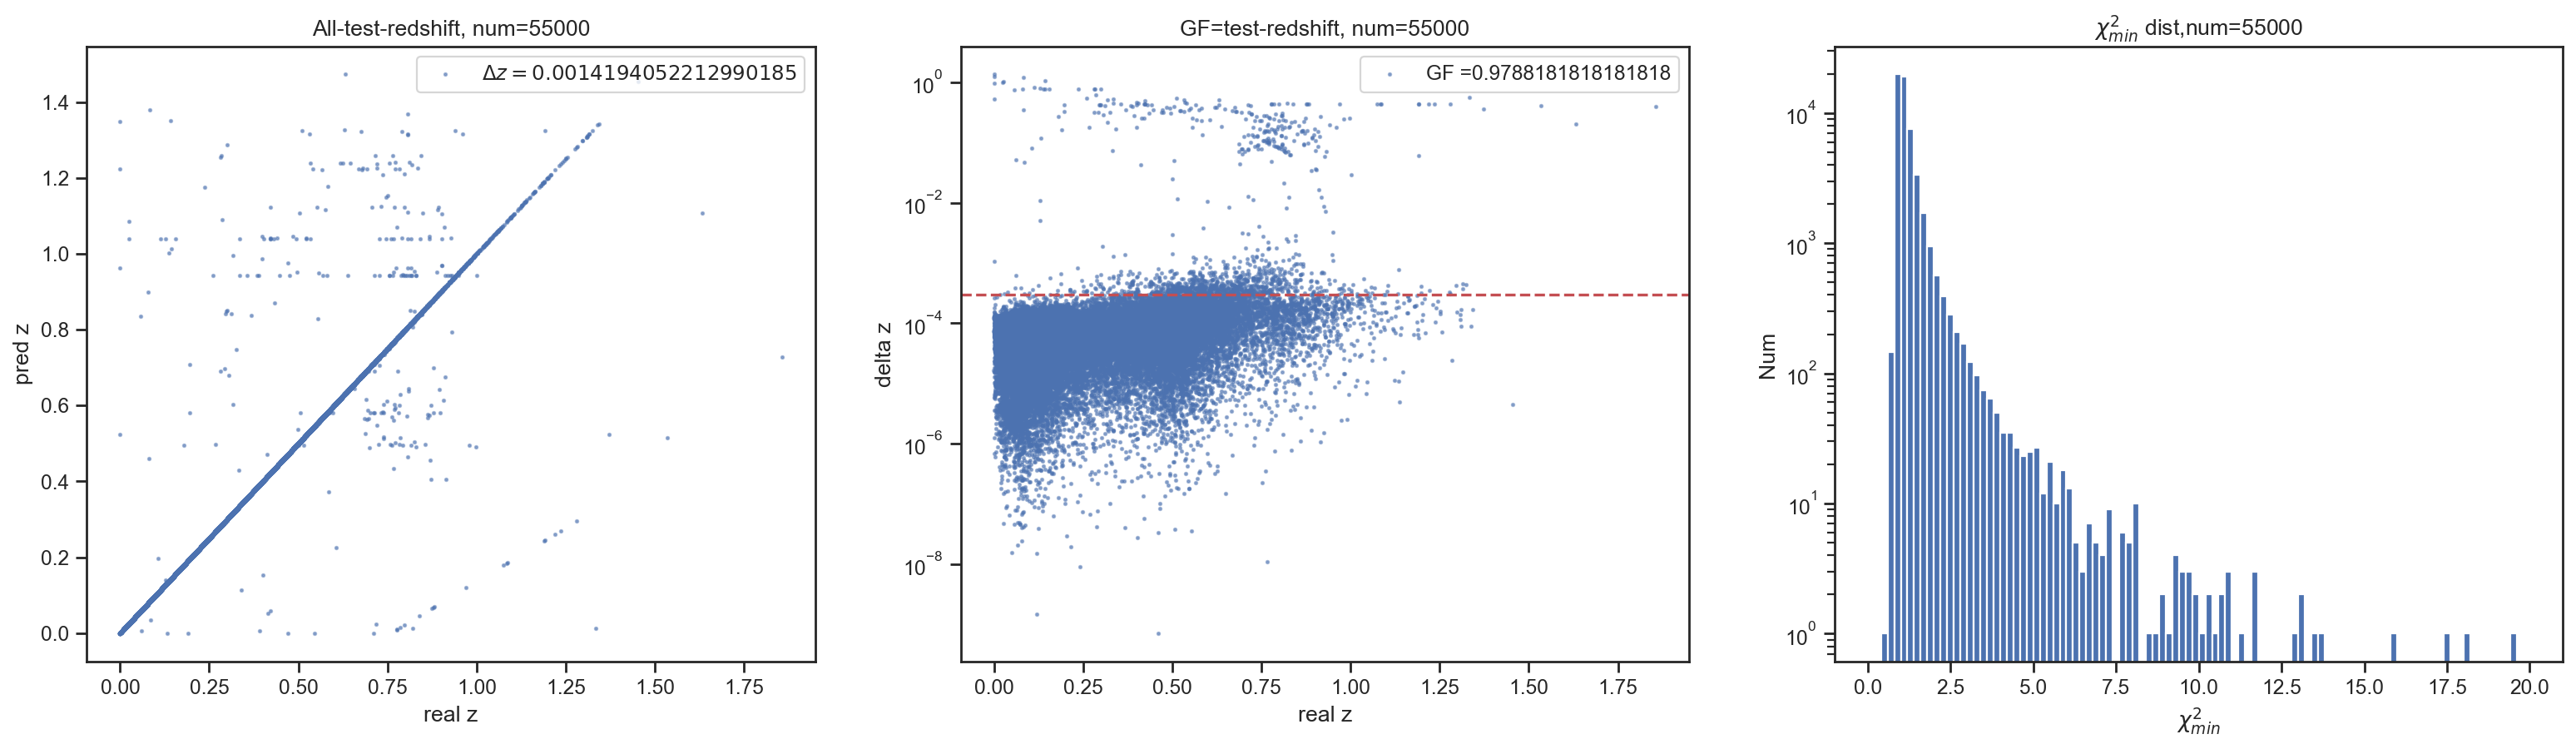

In [7]:
import plot_results
model_name =  'Encoder_SDSS_GALAXY'
plot_results.plot_scatter(f'./results/{model_name}_results.fits', 'test',  threshold=3e-4)
#plot_results.plot_reconstruction(f'./results/{model_name}_reconstruction_examples.fits')
#plot_results.plot_eigenspec(f'./results/{model_name}_reconstruction_examples.fits')

### Test the predictions

In [1]:
from astropy.table import Table
import model_encoder as model
import torch
spec = Table.read('./train_data_3600_9200/QSO.fits')
spec = spec[990:]
# load the trained models
model_names = ['Encoder_SDSS_STAR', 'Encoder_SDSS_GALAXY', 'Encoder_SDSS_QSO']
model_lists = []
for name in model_names:
    Encoder = model.GaSNet3()
    Encoder.device = torch.device('cpu')
    json_file = f'./models/{name}/{name}.json'
    Encoder.Init(load_json=True, json_name=json_file)
    Encoder.test_data = spec
    Encoder.prediction(fname=f'test_{name}')
    model_lists.append(Encoder)

loglam grid: [3.5563 3.5564 3.5565 ... 3.9636 3.9637 3.9638]
pixel num: 4076 4076
{'SNR_thr': 0.0,
 'batch_size': 128,
 'delta_loglamd': 0.0001,
 'egienV_num': 10,
 'end_learning_rate': 0.0001,
 'epochs': 100,
 'model_name': 'Encoder_SDSS_STAR',
 'output_csv': 'models/Encoder_SDSS_STAR/Encoder_SDSS_STAR.csv',
 'output_pth': 'models/Encoder_SDSS_STAR/Encoder_SDSS_STAR.pth',
 'start_learning_rate': 0.001,
 'step_size': 20,
 'wavelength_max': 9200,
 'wavelength_min': 3600,
 'z_max': 0.005,
 'z_min': -0.005}
z_min, z_max = -0.005 0.005
input spectrum wavelength 3600-9200 AA, dim=4076
egienspectrum dim: 4119 [3.55402177 3.5541218  3.55422184 ... 3.96576468 3.96586471 3.96596475]
delta loglamd = 0.00010003472098363275
Spec shape= torch.Size([10, 1, 4076]) torch.Size([10, 1, 4076]) torch.Size([10, 1, 4076])
Spec type= torch.float32 torch.float32


Testing:   0%|          | 0/1 [00:00<?, ?it/s]/Users/apple/Desktop/GaSNet-III-Github/model_encoder.py:322: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/Convolution.cpp:1004.)
  ivar_term  = F.conv1d(output_spetrum[i:i+1]**2, ivar[i:i+1], padding='same') #invert variance term
Testing: 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]


{'SNR_thr': 0.0,
 'batch_size': 128,
 'delta_loglamd': 0.0001,
 'egienV_num': 10,
 'end_learning_rate': 0.0001,
 'epochs': 100,
 'model_name': 'Encoder_SDSS_GALAXY',
 'output_csv': 'models/Encoder_SDSS_GALAXY/Encoder_SDSS_GALAXY.csv',
 'output_pth': 'models/Encoder_SDSS_GALAXY/Encoder_SDSS_GALAXY.pth',
 'start_learning_rate': 0.001,
 'step_size': 20,
 'wavelength_max': 9200,
 'wavelength_min': 3600,
 'z_max': 1.5,
 'z_min': 0}
z_min, z_max = 0 1.5
input spectrum wavelength 3600-9200 AA, dim=4076
egienspectrum dim: 8055 [3.15824782 3.15834784 3.15844785 ... 3.96358779 3.96368781 3.96378783]
delta loglamd = 0.00010001738374354474
Spec shape= torch.Size([10, 1, 4076]) torch.Size([10, 1, 4076]) torch.Size([10, 1, 4076])
Spec type= torch.float32 torch.float32


Testing: 100%|██████████| 1/1 [00:00<00:00,  1.38it/s]


{'SNR_thr': 0.0,
 'batch_size': 128,
 'delta_loglamd': 0.0001,
 'egienV_num': 10,
 'end_learning_rate': 0.0001,
 'epochs': 100,
 'model_name': 'Encoder_SDSS_QSO',
 'output_csv': 'models/Encoder_SDSS_QSO/Encoder_SDSS_QSO.csv',
 'output_pth': 'models/Encoder_SDSS_QSO/Encoder_SDSS_QSO.pth',
 'start_learning_rate': 0.001,
 'step_size': 20,
 'wavelength_max': 9200,
 'wavelength_min': 3600,
 'z_max': 5,
 'z_min': 0}
z_min, z_max = 0 5
input spectrum wavelength 3600-9200 AA, dim=4076
egienspectrum dim: 11858 [2.77803658 2.77813658 2.77823659 ... 3.96358782 3.96368782 3.96378783]
delta loglamd = 0.00010000432237378121
Spec shape= torch.Size([10, 1, 4076]) torch.Size([10, 1, 4076]) torch.Size([10, 1, 4076])
Spec type= torch.float32 torch.float32


Testing: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


/Users/apple/Desktop/GaSNet-III-Github/plot_results.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  chi_square_curve_list = np.array([spectra['chi_square_curve'][i].flatten() for spectra in spec_tabel])


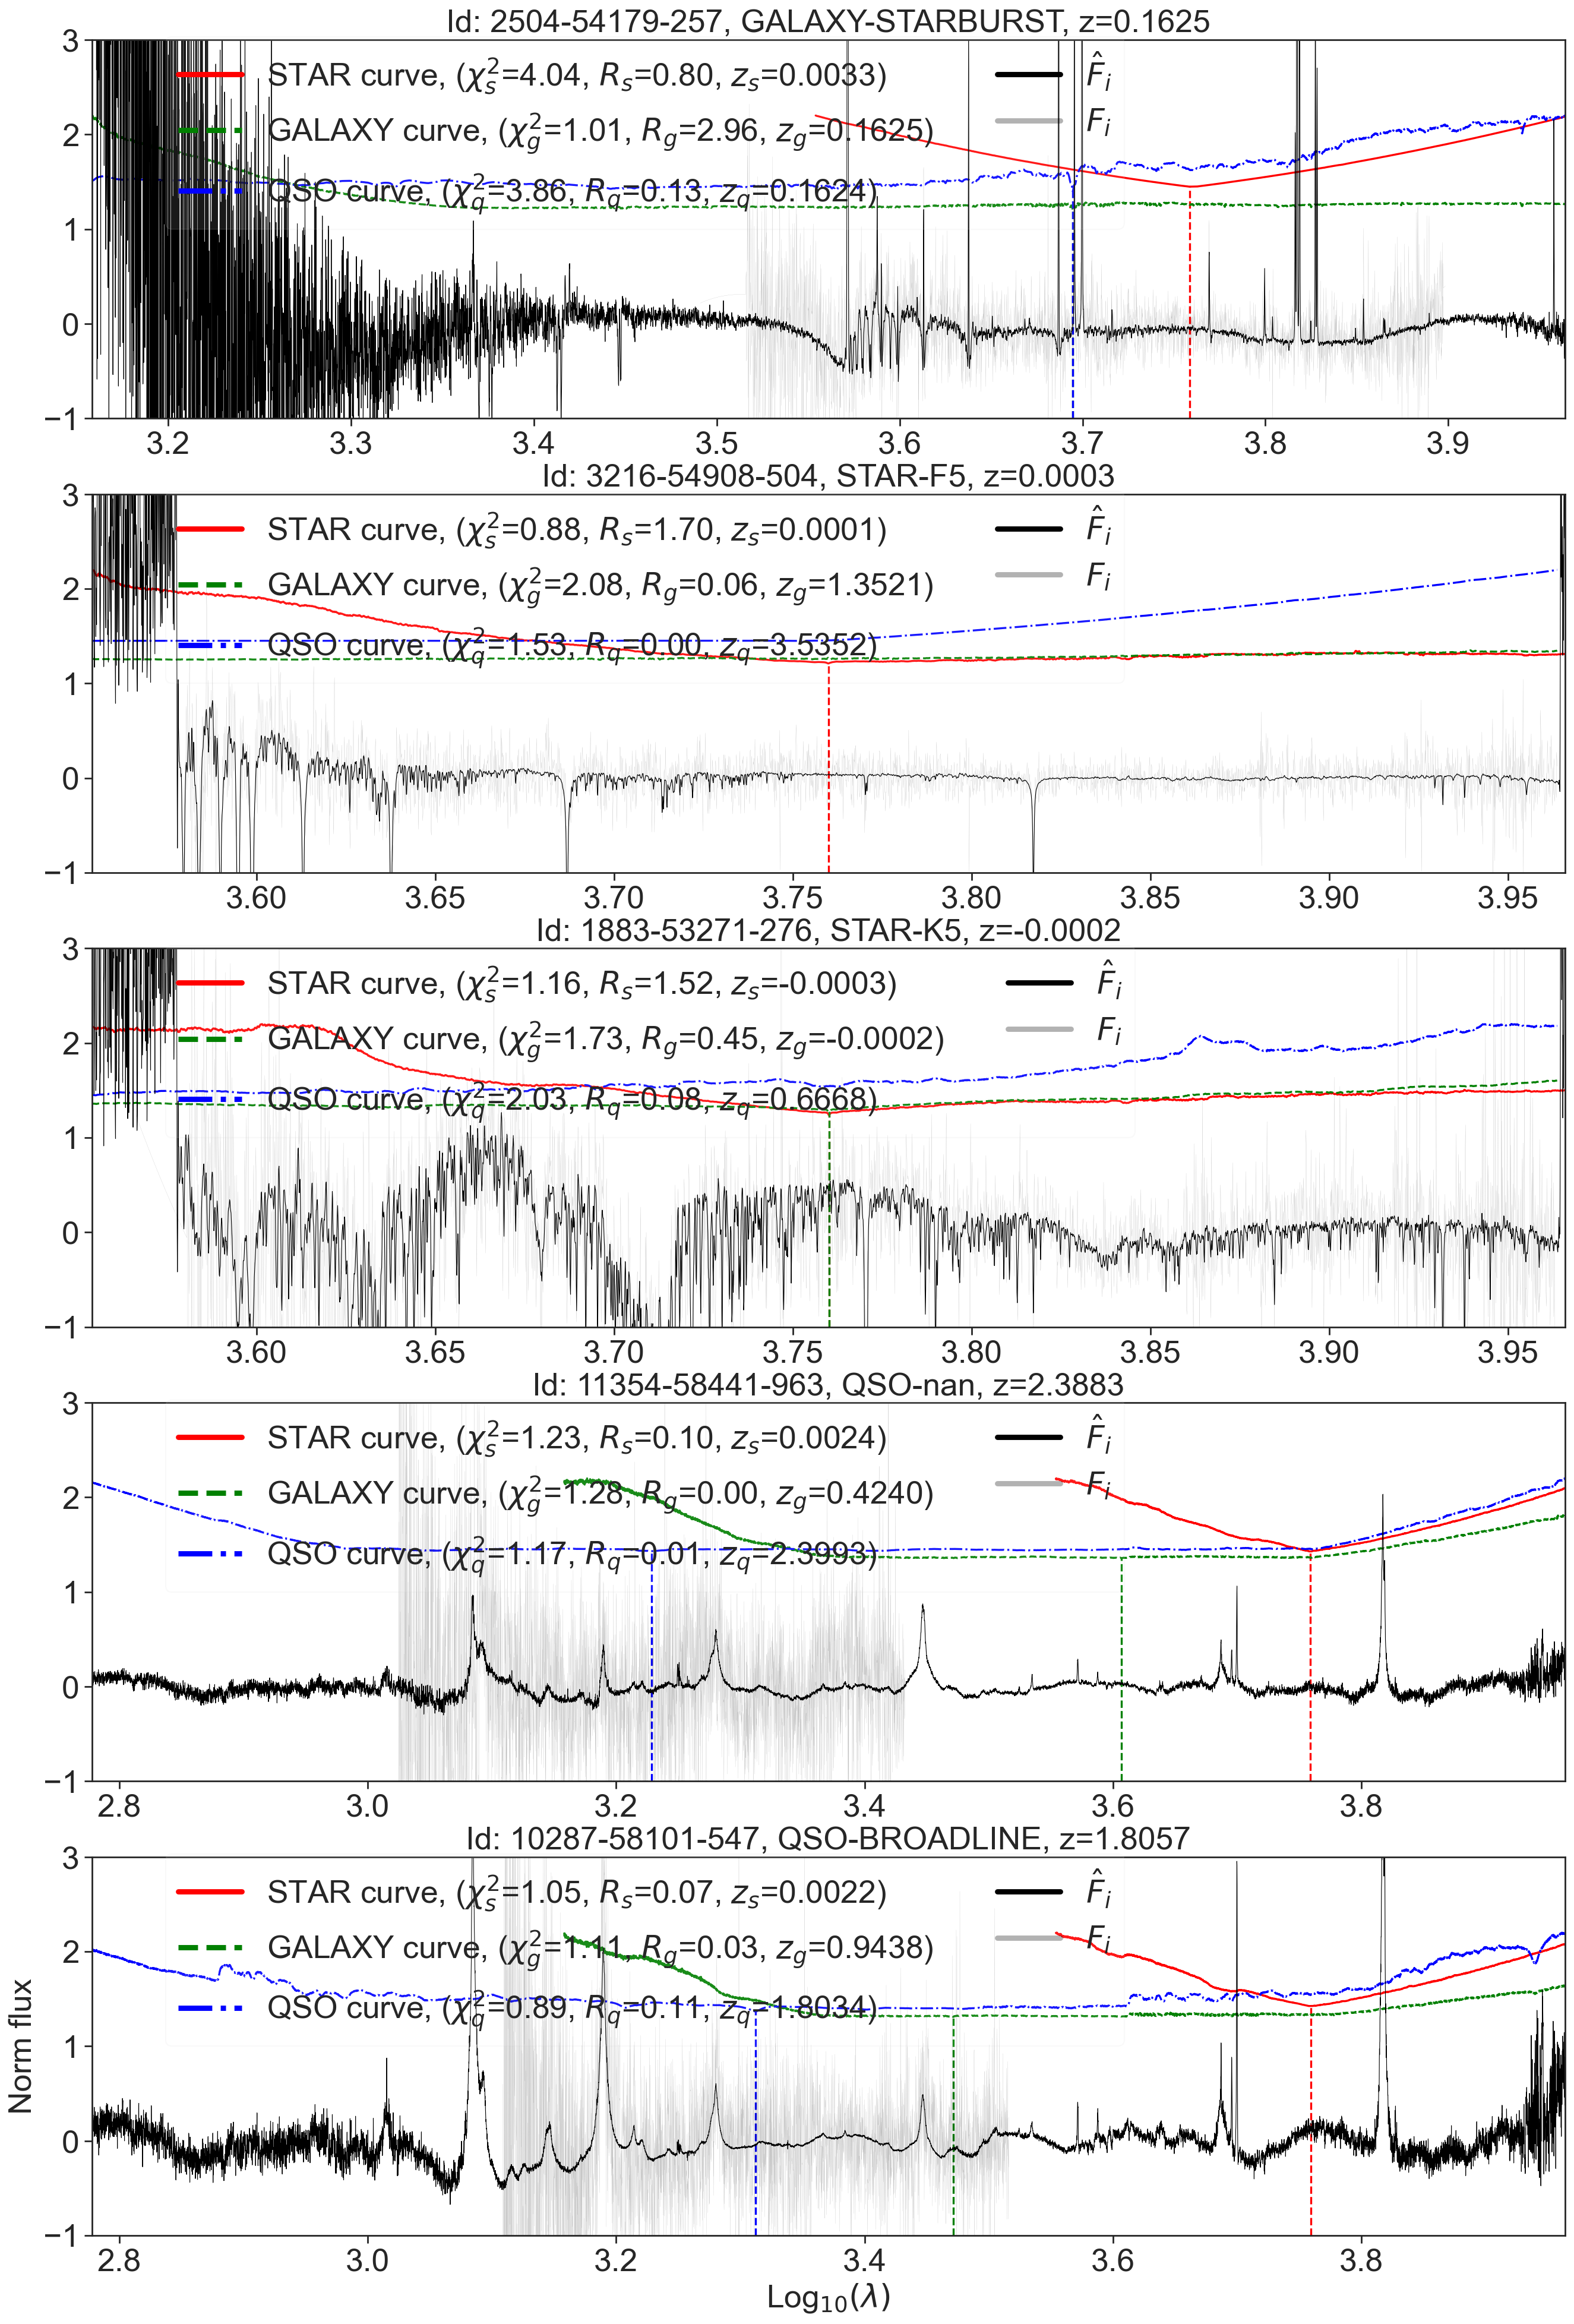

In [3]:
import plot_results
model_names = ['Encoder_SDSS_STAR', 'Encoder_SDSS_GALAXY', 'Encoder_SDSS_QSO']
plot_results.plot_all_chi_square_curve(model_names, indx=[1,2,3,4,5])